In [471]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/properties.csv')

In [456]:
# Define features and target variable
X = df.drop(columns=['id', 'price'])  # Features
y = df['price']  # Target variable

In [457]:
# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist() + ['zip_code']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Numbers is categorical_features convert to str
X['zip_code'] = X['zip_code'].astype(str)

# Remove from numerical_features
numerical_features.remove('zip_code')
numerical_features.remove('cadastral_income')

categorical_features.remove('region')

print(categorical_features)
print(numerical_features)


['property_type', 'subproperty_type', 'province', 'locality', 'equipped_kitchen', 'state_building', 'epc', 'heating_type', 'zip_code']
['latitude', 'longitude', 'construction_year', 'total_area_sqm', 'surface_land_sqm', 'nbr_frontages', 'nbr_bedrooms', 'fl_furnished', 'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm', 'fl_swimming_pool', 'fl_floodzone', 'primary_energy_consumption_sqm', 'fl_double_glazing']


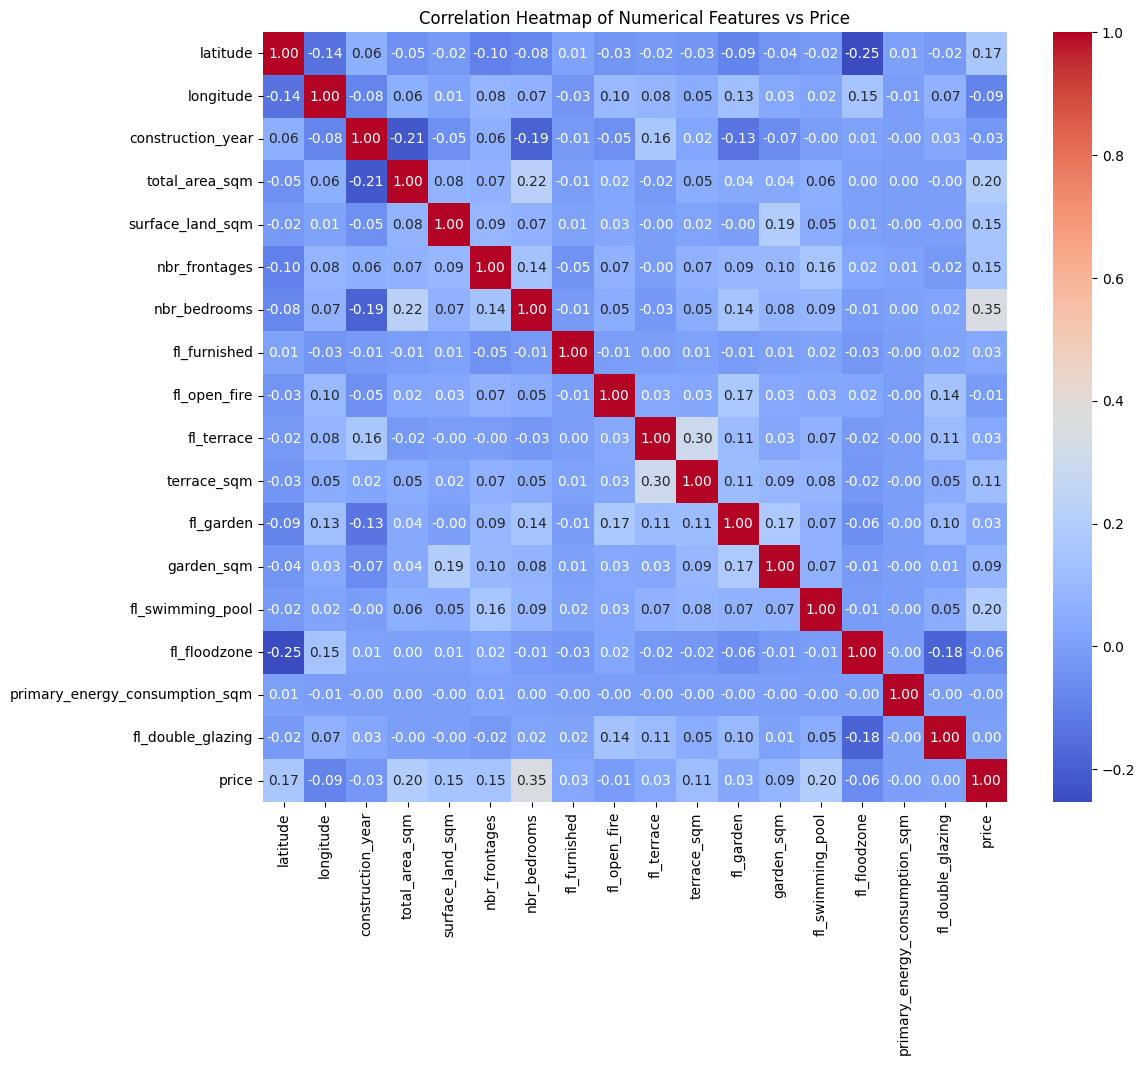

In [472]:
# Concatenate the numerical features and the target variable
data = pd.concat([X[numerical_features], y], axis=1)

# Compute the correlation matrix
corr = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Numerical Features vs Price')
plt.show()


In [460]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=155)

In [ ]:
# Create the imputer
imputer = SimpleImputer(strategy='median')

# Select columns with missing values
columns_with_missing_values = X_train.columns[X_train.isnull().any()].tolist()

# Count the number of missing values per column before imputation
missing_values_before = X_train[columns_with_missing_values].isnull().sum()

# Apply the imputer to the selected columns
X_train[columns_with_missing_values] = imputer.fit_transform(X_train[columns_with_missing_values])

# Count the number of missing values per column after imputation
missing_values_after = X_train[columns_with_missing_values].isnull().sum()

# Get the median values for each column
median_values = imputer.statistics_

# Create a DataFrame to display median values and number of imputed values per column
imputation_summary = pd.DataFrame({
    'Column': columns_with_missing_values,
    'Median': median_values,
    'Imputed Values': missing_values_before - missing_values_after
})

# Display the imputation summary
print("Imputation Summary:")
print(imputation_summary)



Imputation Summary:
                                                        Column       Median  \
latitude                                              latitude    50.902228   
longitude                                            longitude     4.377851   
construction_year                            construction_year  1993.000000   
total_area_sqm                                  total_area_sqm   127.000000   
surface_land_sqm                              surface_land_sqm   362.000000   
nbr_frontages                                    nbr_frontages     3.000000   
terrace_sqm                                        terrace_sqm     1.000000   
garden_sqm                                          garden_sqm     0.000000   
primary_energy_consumption_sqm  primary_energy_consumption_sqm   243.000000   
cadastral_income                              cadastral_income   850.000000   

                                Imputed Values  
latitude                                 11264  
longitude   

In [461]:
# Define preprocessing steps for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='MISSING')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [462]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', PowerTransformer())
])

In scikit-learn, there are several types of scalers available for preprocessing numerical data. These scalers help in transforming numerical features to a similar scale, which is important for many machine learning algorithms. Here are some common types of scalers:

    StandardScaler:
        Standardizes features by removing the mean and scaling to unit variance.
        Centers the data around 0 and scales it to have a standard deviation of 1.
        Suitable for data with a Gaussian distribution or when features have different units.

    MinMaxScaler:
        Scales features to a given range, typically between 0 and 1.
        Preserves the shape of the original distribution while ensuring that all features are within the same scale.
        Suitable for algorithms that require features to be on a similar scale, such as gradient descent-based algorithms.

    MaxAbsScaler:
        Scales features by dividing by the maximum absolute value of each feature.
        Preserves the sign of the original values and ensures that they lie within the range [-1, 1].
        Suitable for sparse data or data with outliers.

    RobustScaler:
        Scales features using statistics that are robust to outliers.
        Centers and scales the data based on the interquartile range (IQR) instead of the mean and standard deviation.
        Suitable for data with outliers or non-Gaussian distributions.

    QuantileTransformer:
        Transforms features to follow a uniform or a normal distribution.
        Maps the data to a specified quantile distribution using a non-linear transformation.
        Suitable for data that does not follow a Gaussian distribution or requires a more uniform distribution.

    PowerTransformer:
        Applies power transformations to make the data more Gaussian-like.
        Supports both Yeo-Johnson and Box-Cox transformations to handle positive and negative values.
        Suitable for data with skewed distributions or heteroscedasticity.


The PowerTransformer is a preprocessing technique in scikit-learn that applies power transformations to make the data more Gaussian-like. It addresses skewed distributions and heteroscedasticity by transforming the data to be more symmetric and homoscedastic. This can lead to improved model performance, especially for algorithms that assume normally distributed features.

Here are some key points about the PowerTransformer:

    Transformation Methods:
        The PowerTransformer supports two different power transformation methods: Yeo-Johnson and Box-Cox.
        The Yeo-Johnson transformation handles both positive and negative values, making it more flexible than the Box-Cox transformation, which only works with strictly positive values.

    Normalization:
        By default, the PowerTransformer applies a power transformation that aims to normalize the data, making it more Gaussian-like.
        This can be useful for algorithms that assume normally distributed features, such as linear regression, logistic regression, and linear discriminant analysis.

    Handling Skewed Distributions:
        Skewed distributions, where the data is not symmetric around the mean, can affect the performance of machine learning models.
        The PowerTransformer can help address skewed distributions by transforming the data to be more symmetric, potentially improving the model's ability to capture underlying patterns.

    Handling Heteroscedasticity:
        Heteroscedasticity refers to situations where the variance of the target variable differs across different levels of the predictor variables.
        The PowerTransformer can help mitigate heteroscedasticity by transforming the data to have more uniform variance, leading to more stable model predictions.

    Parameters:
        The PowerTransformer allows you to specify the method for power transformation ('yeo-johnson' or 'box-cox') using the method parameter.
        Additionally, you can control the scaling of the transformed data using the standardize parameter, which defaults to True to scale the data to have zero mean and unit variance.

In [463]:
# Combine preprocessing steps for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

In [464]:
# Define the model
model = LinearRegression()

In [465]:
# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

In [466]:
# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['property_type',
                                                   'subproperty_type',
                                                   'province', 'locality',
                                                   'equipped_kitchen',
                                                   'state_building', 'epc',
                                                   'heating_type',
                                                   'zip_code']),
                                                 ('num',
                                                  Pipeline...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['latitude', 'longitude',
                                                   'construction_year',
                                                   'total_area_sqm',
                                                   'surface_land_sqm',
                                                   'nbr_frontages',
                                                   'nbr_bedrooms',
                                                   'fl_furnished',
                                                   'fl_open_fire', 'fl_terrace',
                                                   'terrace_sqm', 'fl_garden',
                                                   'garden_sqm',
                                                   'fl_swimming_pool',
                                                   'fl_floodzone',
                                                   'primary_energy_consumption_sqm',
                                                   'fl_double_glazing'])])),
                ('model', LinearRegression())])

In [467]:
# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

In [468]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 85543702149.27031
R-squared: 0.49458770117735407


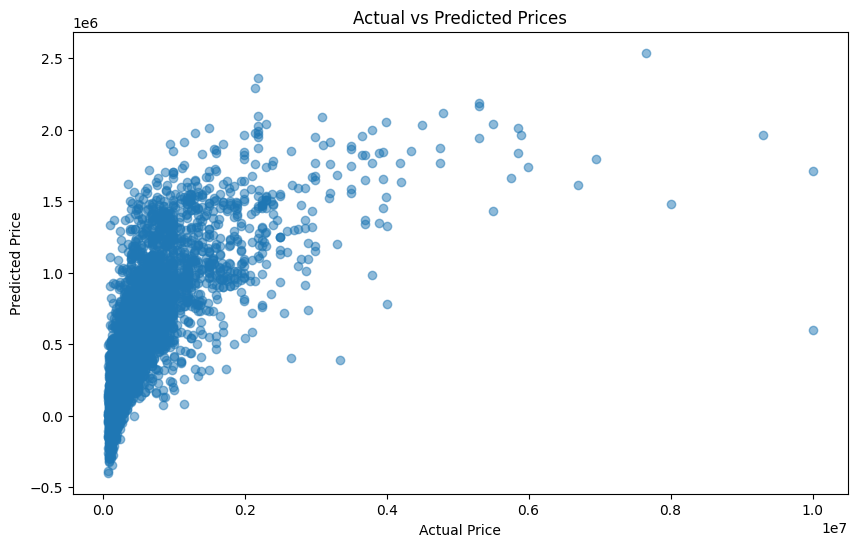

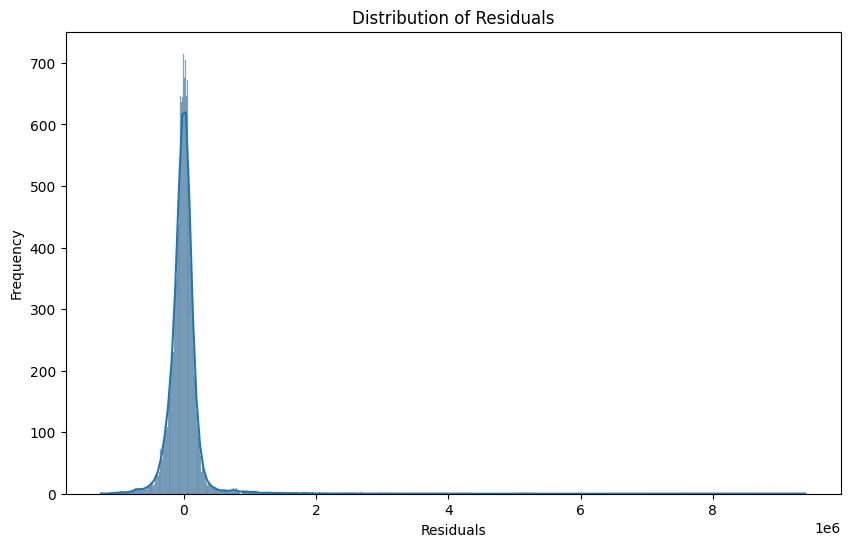

In [473]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()